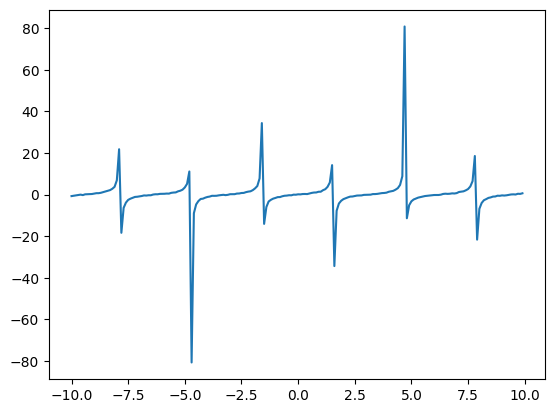

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from RNNTrainer import *

x=np.arange(-10,10,0.1)
x = x.reshape(len(x),1)
y = np.tan(x)+0.1*np.random.randn(len(x),1)

plt.plot(x,y)
plt.show()

-------------------------
 Epoch 0, Loss: 46.616
-------------------------
 Epoch 1000, Loss: 45.648
-------------------------
 Epoch 2000, Loss: 45.488
-------------------------
 Epoch 3000, Loss: 41.974
-------------------------
 Epoch 4000, Loss: 37.046
-------------------------
 Epoch 5000, Loss: 44.182
-------------------------
 Epoch 6000, Loss: 41.911
-------------------------
 Epoch 7000, Loss: 50.406
-------------------------
 Epoch 8000, Loss: 15.086
-------------------------
 Epoch 9000, Loss: 1.474
-------------------------
 Epoch 10000, Loss: 4.94
####################################################################################################
Min loss achieved: [[0.0299]]
####################################################################################################


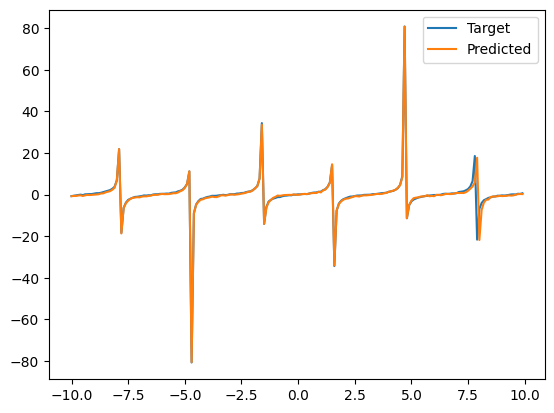

In [2]:
model1 = RNNTrainer(x, y,optimizer_type="SGD")
model1.train()
model1.plot_results()

-------------------------
 Epoch 0, Loss: 46.647


-------------------------
 Epoch 1000, Loss: 36.418
-------------------------
 Epoch 2000, Loss: 34.403
-------------------------
 Epoch 3000, Loss: 31.478
-------------------------
 Epoch 4000, Loss: 22.71
-------------------------
 Epoch 5000, Loss: 34.383
-------------------------
 Epoch 6000, Loss: 15.576
-------------------------
 Epoch 7000, Loss: 17.094
-------------------------
 Epoch 8000, Loss: 13.299
-------------------------
 Epoch 9000, Loss: 21.511
-------------------------
 Epoch 10000, Loss: 44.204
####################################################################################################
Min loss achieved: [[5.1084]]
####################################################################################################


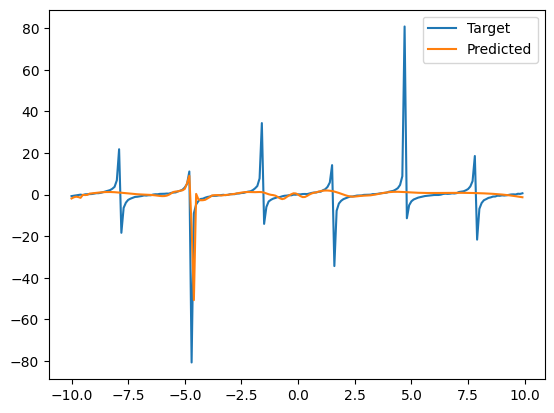

In [3]:
model2 = RNNTrainer(x, y,optimizer_type="Adam")
model2.train()
model2.plot_results()